In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Mobile Reviews Sentiment.csv")

In [3]:
df.head()

,review_id,customer_name,age,brand,model,price_usd,price_local,currency,exchange_rate_to_usd,rating,...,verified_purchase,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating,review_length,word_count,helpful_votes,source
0,1,Aryan Maharaj,45,Realme,Realme 12 Pro,337.31,₹27996.73,INR,83.00,2,...,True,1,1,3,2,1,46,7,1,Amazon
1,2,Davi Miguel Sousa,18,Realme,Realme 12 Pro,307.78,R$1754.35,BRL,5.70,4,...,True,3,2,4,3,2,74,12,5,Flipkart
2,3,Pahal Balay,27,Google,Pixel 6,864.53,₹71755.99,INR,83.00,4,...,True,3,5,3,2,4,55,11,8,AliExpress
3,4,David Guzman,19,Xiaomi,Redmi Note 13,660.94,د.إ2425.65,AED,3.67,3,...,False,1,3,2,1,2,66,11,3,Amazon
4,5,Yago Leão,38,Motorola,Edge 50,792.13,R$4515.14,BRL,5.70,3,...,True,3,3,2,2,1,73,12,0,BestBuy


In [4]:
df.shape

(50000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_id             50000 non-null  int64  
 1   customer_name         50000 non-null  object 
 2   age                   50000 non-null  int64  
 3   brand                 50000 non-null  object 
 4   model                 50000 non-null  object 
 5   price_usd             50000 non-null  float64
 6   price_local           50000 non-null  object 
 7   currency              50000 non-null  object 
 8   exchange_rate_to_usd  50000 non-null  float64
 9   rating                50000 non-null  int64  
 10  review_text           50000 non-null  object 
 11  sentiment             50000 non-null  object 
 12  country               50000 non-null  object 
 13  language              50000 non-null  object 
 14  review_date           50000 non-null  object 
 15  verified_purchase  

In [6]:
df['sentiment'].value_counts()

sentiment
Positive    27540
Neutral     12549
Negative     9911
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

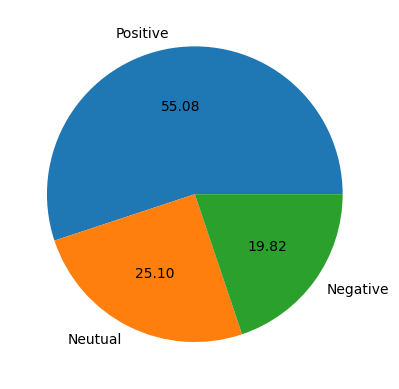

In [8]:
plt.pie(df['sentiment'].value_counts(), labels=['Positive','Neutual','Negative'], autopct='%0.2f')
plt.show()

In [9]:
df = df[['review_text', 'sentiment']]

In [10]:
import nltk
import re
import string


In [11]:
nltk.download('stopwords')
from nltk.corpus import stopwords
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Umar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [13]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Umar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Umar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Umar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Umar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation
lemmatization = WordNetLemmatizer()

In [15]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', punctuations))
    text = re.sub(r'\d+','', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatization.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [16]:
df['review_text'] = df['review_text'].apply(clean_text)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

print(le.classes_)


['Negative' 'Neutral' 'Positive']


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)  
X = tfidf.fit_transform(df['review_text'])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [39]:
X_test.shape

(10000, 111)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

In [24]:
y_pred = model.predict(X_test)

In [25]:
print(accuracy_score(y_test,y_pred))

1.0


In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation accuracies: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0


In [28]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       1.00      1.00      1.00      2538
           2       1.00      1.00      1.00      5464

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [29]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       1.00      1.00      1.00      2538
           2       1.00      1.00      1.00      5464

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [31]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report




[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 1.8 MB/s eta 0:00:39
   ---------------------------------------- 0.8/72.0 MB 1.8 MB/s eta 0:00:39
    --------------------------------------- 1.0/72.0 MB 1.4 MB/s eta 0:00:52
    --------------------------------------- 1.0/72.0 MB 1.4 MB/s eta 0:00:52
    --------------------------------------- 1.3/72.0 MB 1.2 MB/s eta 0:01:02
   - -------------------------------------- 1.8/72.0 MB 1.2 MB/s eta 0:00:58
   - -------------------------------------- 2.1/72.0 MB 1.3 MB/s eta 0:00:54
   - -------------------------------------- 2.6/72.0 MB 1.4 MB/s eta 0:00:50
   - -------------------------------------- 2.9/72.0 MB 1.4 MB/s eta 0:00:49
   - -------------------------------------- 3.4/72.0 MB 1.5 MB/s eta 0:00:47
   -- ------------------------------------- 3.7/72.0 MB 1.5 MB/s eta 0:00:47
   -- -------

In [32]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()


In [33]:
xgb_model = XGBClassifier(
    objective='multi:softmax', 
    num_class=len(le.classes_),
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train_dense, y_train)


C:\Users\Umar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:19:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=3, ...)

In [34]:
y_pred_xgb = xgb_model.predict(X_test_dense)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1998
           1       1.00      1.00      1.00      2538
           2       1.00      1.00      1.00      5464

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X.toarray(), y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", scores)
print("Mean CV accuracy:", scores.mean())


C:\Users\Umar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:21:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Umar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:21:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Umar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:21:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Umar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:21:45] WARNING: C:\actions-r

Cross-validation accuracies: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0


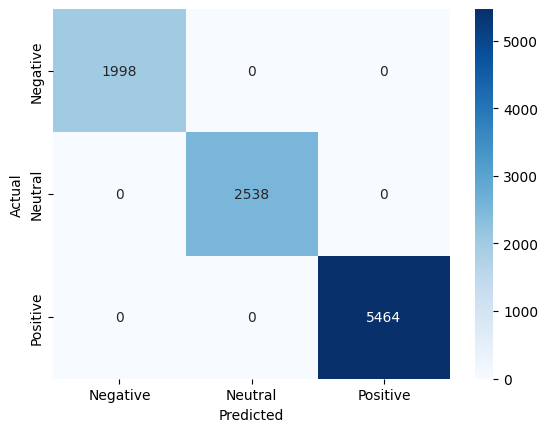

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
